In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

C:\Users\anast\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# LAB 08 -  Fourier Transforms

## DUE: Friday 8 March 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you additional practice with Fourier Series and some introductory items in Fourier Transforms.  

**Note: You must show your analytical/numerical work (you may upload photos of your work rather than typeset through LaTeX), and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook!**



## **Q1**: North Korean Nuclear tests.  

North Korea has been in the news regarding their recent test of nuclear weaponry on 3 Sept 2017 at 3.30am (UTC).  This question looks at the ground motion signals arriving at the MDJ seismic station located in Mudanjiang, Heilongjiang Province, China.  I have used the *obspy* seismic analysis package to query the [IRIS](https://www.iris.edu/hq/) database for the recording of the vertical component at this station for this time period.  Because installing *obspy* has another layer of difficulty, you are not required to do this.  Instead, I have downloaded and saved the data required for you to complete this question (but give you the code required to reproduce it).

In [2]:
#########################
#
# . . LARGER 2017 TEST
#
#########################
#t = UTCDateTime("2017-09-03_03:30:00")
#PRK_03SEPT2017_NUCLEAR_TEST = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 12*60)
#np.savetxt('PRK_test1.txt', PRK_03SEPT2017_NUCLEAR_TEST.traces[0].data, fmt='%f')

## . . You just need to read in the text file as floating point numbers
test1_t = np.loadtxt("C:\\Users\\anast\\Documents\\404 DSP\\Lab08-2024\\PRK_test1.txt", dtype=float)

#########################
#
# . . SMALLER 2016 TEST
#
#########################
#t = UTCDateTime("2016-09-09_00:30:00")
#PRK_09SEPT2016_NUCLEAR_TEST = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 12*60)
#test2_t = PRK_09SEPT2016_NUCLEAR_TEST.traces[0]
#np.savetxt('PRK_test2.txt', PRK_09SEPT2016_NUCLEAR_TEST.traces[0].data, fmt='%f')

## . . You just need to read in the text file as floating point numbers
test2_t = np.loadtxt("C:\\Users\\anast\\Documents\\404 DSP\\Lab08-2024\\PRK_test2.txt", dtype=float)

## . . Get Sampling rate, number of samples and scaling factor
sr    = 20           # . . Sampling rate in Hz
npts  = len(test1_t) # . . Number of points in time series
scale = 1/1000000    # . . Conversion from nm to mm (you should plot the measured displacements in mm)

**Your Assignment:**

(a) Plot the ground motion time series and power spectra for each of the nuclear tests.   Make sure to annotate and convert amplitudes to mm (using given *scale*) factor.  Make an estimate of how much stronger the ground motion was for the 2017 nuclear test relative to the 2016 test.

Text(0.5, 0, 'Frequency (Hz)')

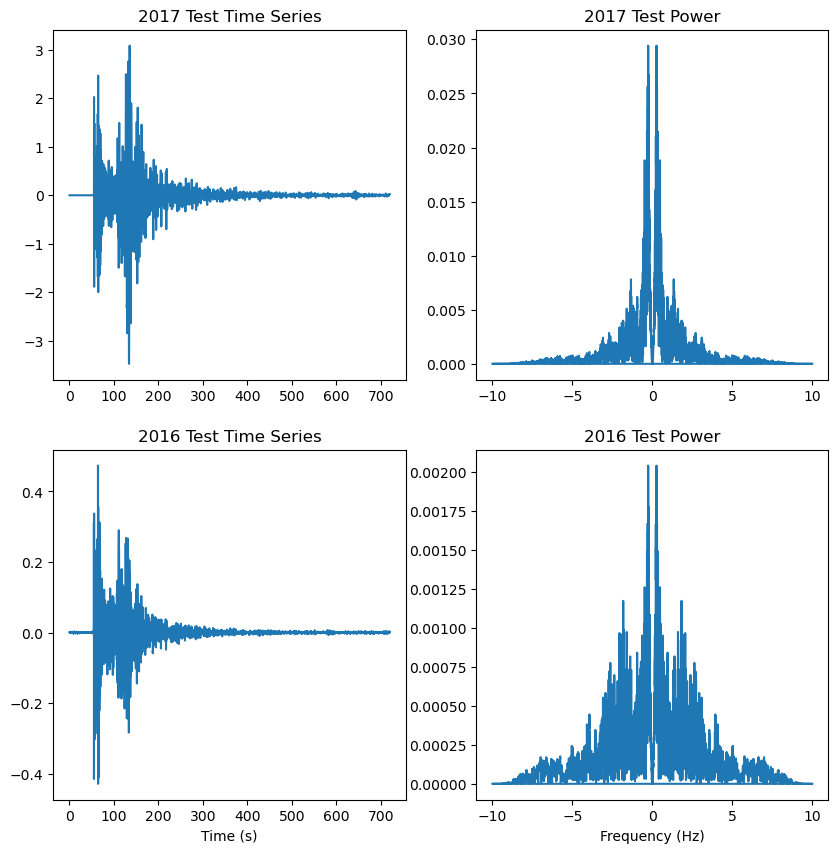

In [3]:
## . . Your answer to Q1-a
time=np.arange(0,npts)/sr
freq=np.fft.fftfreq(npts,1./sr)
#scale our data
test1_scale=test1_t*scale - (np.mean(test1_t)*scale)
test2_scale=test2_t*scale - (np.mean(test2_t)*scale)

#fourier transform
test1_fft=np.fft.fft(test1_scale) /npts
test2_fft=np.fft.fft(test2_scale) /npts

#power spectra
test1_power= np.abs(test1_fft)
test2_power= np.abs(test2_fft)


#plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].plot(time,test1_scale)
axs[0,0].set_title('2017 Test Time Series')
axs[0,1].plot(freq, test1_power)
axs[0,1].set_title('2017 Test Power')

axs[1,0].plot(time, test2_scale)
axs[1,0].set_title('2016 Test Time Series')
axs[1,1].plot(freq, test2_power)
axs[1,1].set_title('2016 Test Power')
axs[1,0].set_xlabel("Time (s)")
axs[1,1].set_xlabel("Frequency (Hz)")     

I think the ground motion for the 2017 test was about $10$ times stronger than the ground motion for the 2016 test.

(b) Plot the  **power spectra ratio** for the 2017 test compared to the 2016 test.  Based on this plot discuss the similarities and differences in the spectral content of the two tests.

Text(0.5, 1.0, 'Power Spectra Ratio')

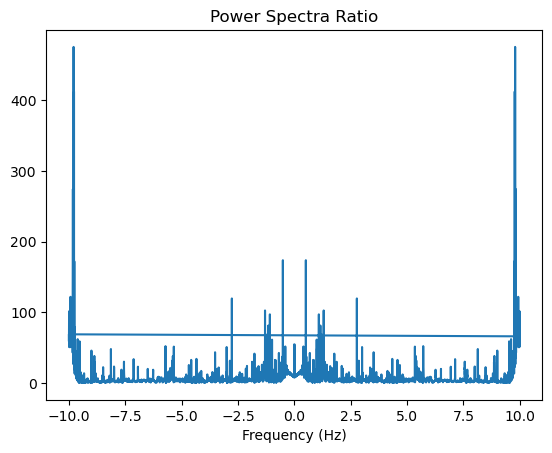

In [4]:
## . . Your answer to Q1-b
power_ratio= test1_power/ test2_power
plt.plot(freq, power_ratio)
plt.xlabel("Frequency (Hz)") 
plt.title("Power Spectra Ratio")

We see that for the tests their spectral contents are very different. The higher the spike at a given frequency, the more different the spectal content between the 2017 test (test1) and 2016 test (test2). For frequency values $\pm 10$, $\pm 2.8$, and $\pm 0.6$ we see the largest difference between the tests. However there seems to be frequencies where the tests are fairly similar. For example the frequencies between $\approx 6$ and $7.5$ have smaller spikes. 

(c) In the 2017 test, it has been reported that the testing chamber collapsed roughly 10 minutes after the test.  Do you see any evidence for this claim? Provide a plot and discuss.

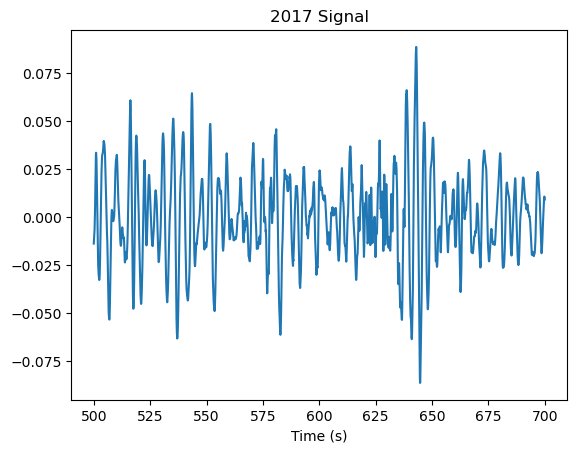

Text(0.5, 0, 'Time (s)')

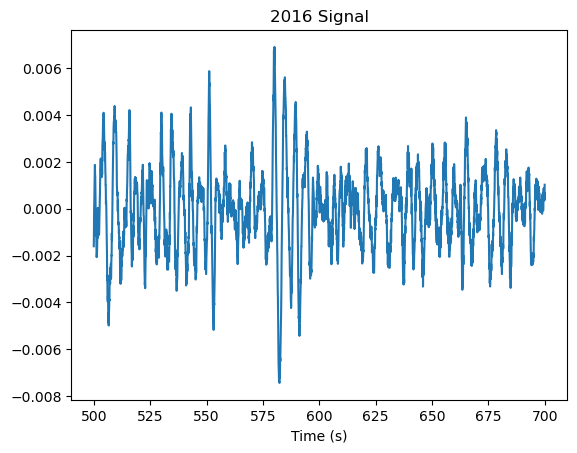

In [5]:
## . . Your answer to Q1-c
#10 minutes corresponds to 600 seconds goest to 20*600 = 12000 points
plt.plot(time[10000:14000], test1_scale[10000:14000])
plt.title("2017 Signal")
plt.xlabel("Time (s)")
plt.show()

plt.plot(time[10000:14000], test2_scale[10000:14000])
plt.title("2016 Signal")
plt.xlabel("Time (s)")

We know that $10$ minutes is equivalent to $600$ seconds, so we can plot the behavior around $t=600$ for both test years and compare their behavior to determine if the claim is true. We see that both years have similar behavior, for example they are both very noisy and have a similar shaped maximum peak. Since both plots have similar behavior I would assume their testing chambers behaved similarly, so assuming the 2016 chamber didn't collapse, then I would believe the 2017 chamber didn't collapse.

However, if I was to only consider the 2017 plot, then I would assume the chamber did collapse because we see a spike/change in behavior about $50$ seconds after 10 minutes. The spike means something caused our signal to spike after the test was concluded, which could be a collapse of a structure. 

(d) You might notice that the ratio is very spikey. Why is it this why? Describe a strategy you could use to mitigate this issue.

The ratio is very spikey because of how noisy our signal is, which causes a very spikey and dense power spectra. One way to combat this would be to convovle our original signal with some kernel.
